In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense

2024-05-11 14:20:16.624869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('final_dataset.csv')

columns_to_drop = ['Sample_ID', 'Result', 'Status']
target_column = 'Status'
X_train = data.drop(columns_to_drop, axis=1)
Y_train = data[target_column]
feature_names = list(X_train.columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.4, random_state=42)

print(f"""
Training
Breast Cancer: {(Y_train == 2).sum()}
Healthy: {(Y_train == 0).sum()}
Asthma: {(Y_train == 1).sum()}
Pulmonary Fibrosis: {(Y_train == 3).sum()}
Hepatocellular carcinoma: {(Y_train == 4).sum()}
Lung_Cancer: {(Y_train == 5).sum()}
Bladder_Cancer: {(Y_train == 6).sum()}
""")

print(f"""
Testing
Breast Cancer: {(Y_test == 2).sum()}
Healthy: {(Y_test == 0).sum()}
Asthma: {(Y_test == 1).sum()}
Pulmonary Fibrosis: {(Y_test == 3).sum()}
Hepatocellular carcinoma: {(Y_test == 4).sum()}
Lung_Cancer: {(Y_test == 5).sum()}
Bladder_Cancer: {(Y_test == 6).sum()}
""")


Training
Breast Cancer: 88
Healthy: 186
Asthma: 42
Pulmonary Fibrosis: 32
Hepatocellular carcinoma: 150
Lung_Cancer: 41
Bladder_Cancer: 118


Testing
Breast Cancer: 74
Healthy: 126
Asthma: 31
Pulmonary Fibrosis: 25
Hepatocellular carcinoma: 93
Lung_Cancer: 19
Bladder_Cancer: 71



In [3]:
model = Sequential([
    Input(shape=(10,1)),
    
    Conv1D(32, kernel_size=3, activation='relu', name='conv1'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(64, kernel_size=3, activation='relu', name='conv2'),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    
    Dense(128, activation='relu', name='dense1'),
    Dense(64, activation='relu', name='dense2'),
    
    Dense(7, activation='softmax', name='output')
], name='cnn_model')


In [4]:
model.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv1D)                  │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 2, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,367 (91.28 KB)

 Trainable params: 23,367 (91.28 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
final_model = model.fit(
    X_train,Y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4411 - loss: 1.8482 - val_accuracy: 0.5833 - val_loss: 1.5085
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6322 - loss: 1.3094 - val_accuracy: 0.6212 - val_loss: 0.9678
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7577 - loss: 0.7648 - val_accuracy: 0.8106 - val_loss: 0.5501
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8584 - loss: 0.4529 - val_accuracy: 0.8864 - val_loss: 0.3704
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8572 - loss: 0.3344 - val_accuracy: 0.9242 - val_loss: 0.2887
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9202 - loss: 0.2480 - val_accuracy: 0.9318 - val_loss: 0.2174
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.2303 - val_accuracy: 0.9621 - val_loss: 0.1778
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9383 - loss: 0.1817 - val_accuracy: 0.9621 - val_loss

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.1767 
Test Accuracy: 0.9498860836029053


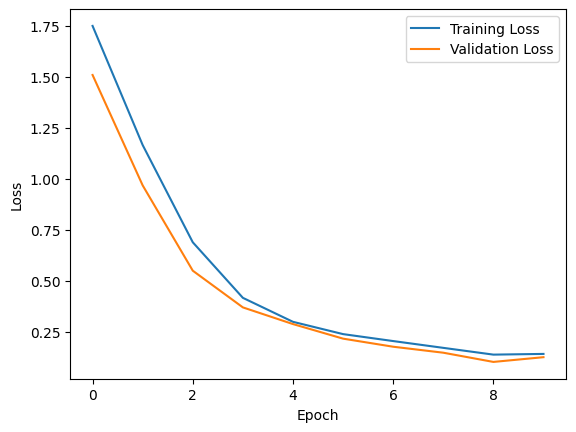

In [7]:
import matplotlib.pyplot as plt

plt.plot(final_model.history['loss'], label='Training Loss')
plt.plot(final_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
xgb_model = XGBClassifier()
feature_selector = SelectFromModel(estimator=xgb_model, max_features=10, threshold=-np.inf)
feature_selector.fit(X_train, Y_train)

X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

xgb_model_selected = XGBClassifier(objective="multi:softmax", num_class = 7, seed = 42)
xgb_model_selected.fit(X_train_selected, Y_train)

accuracy = xgb_model_selected.score(X_test_selected, Y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


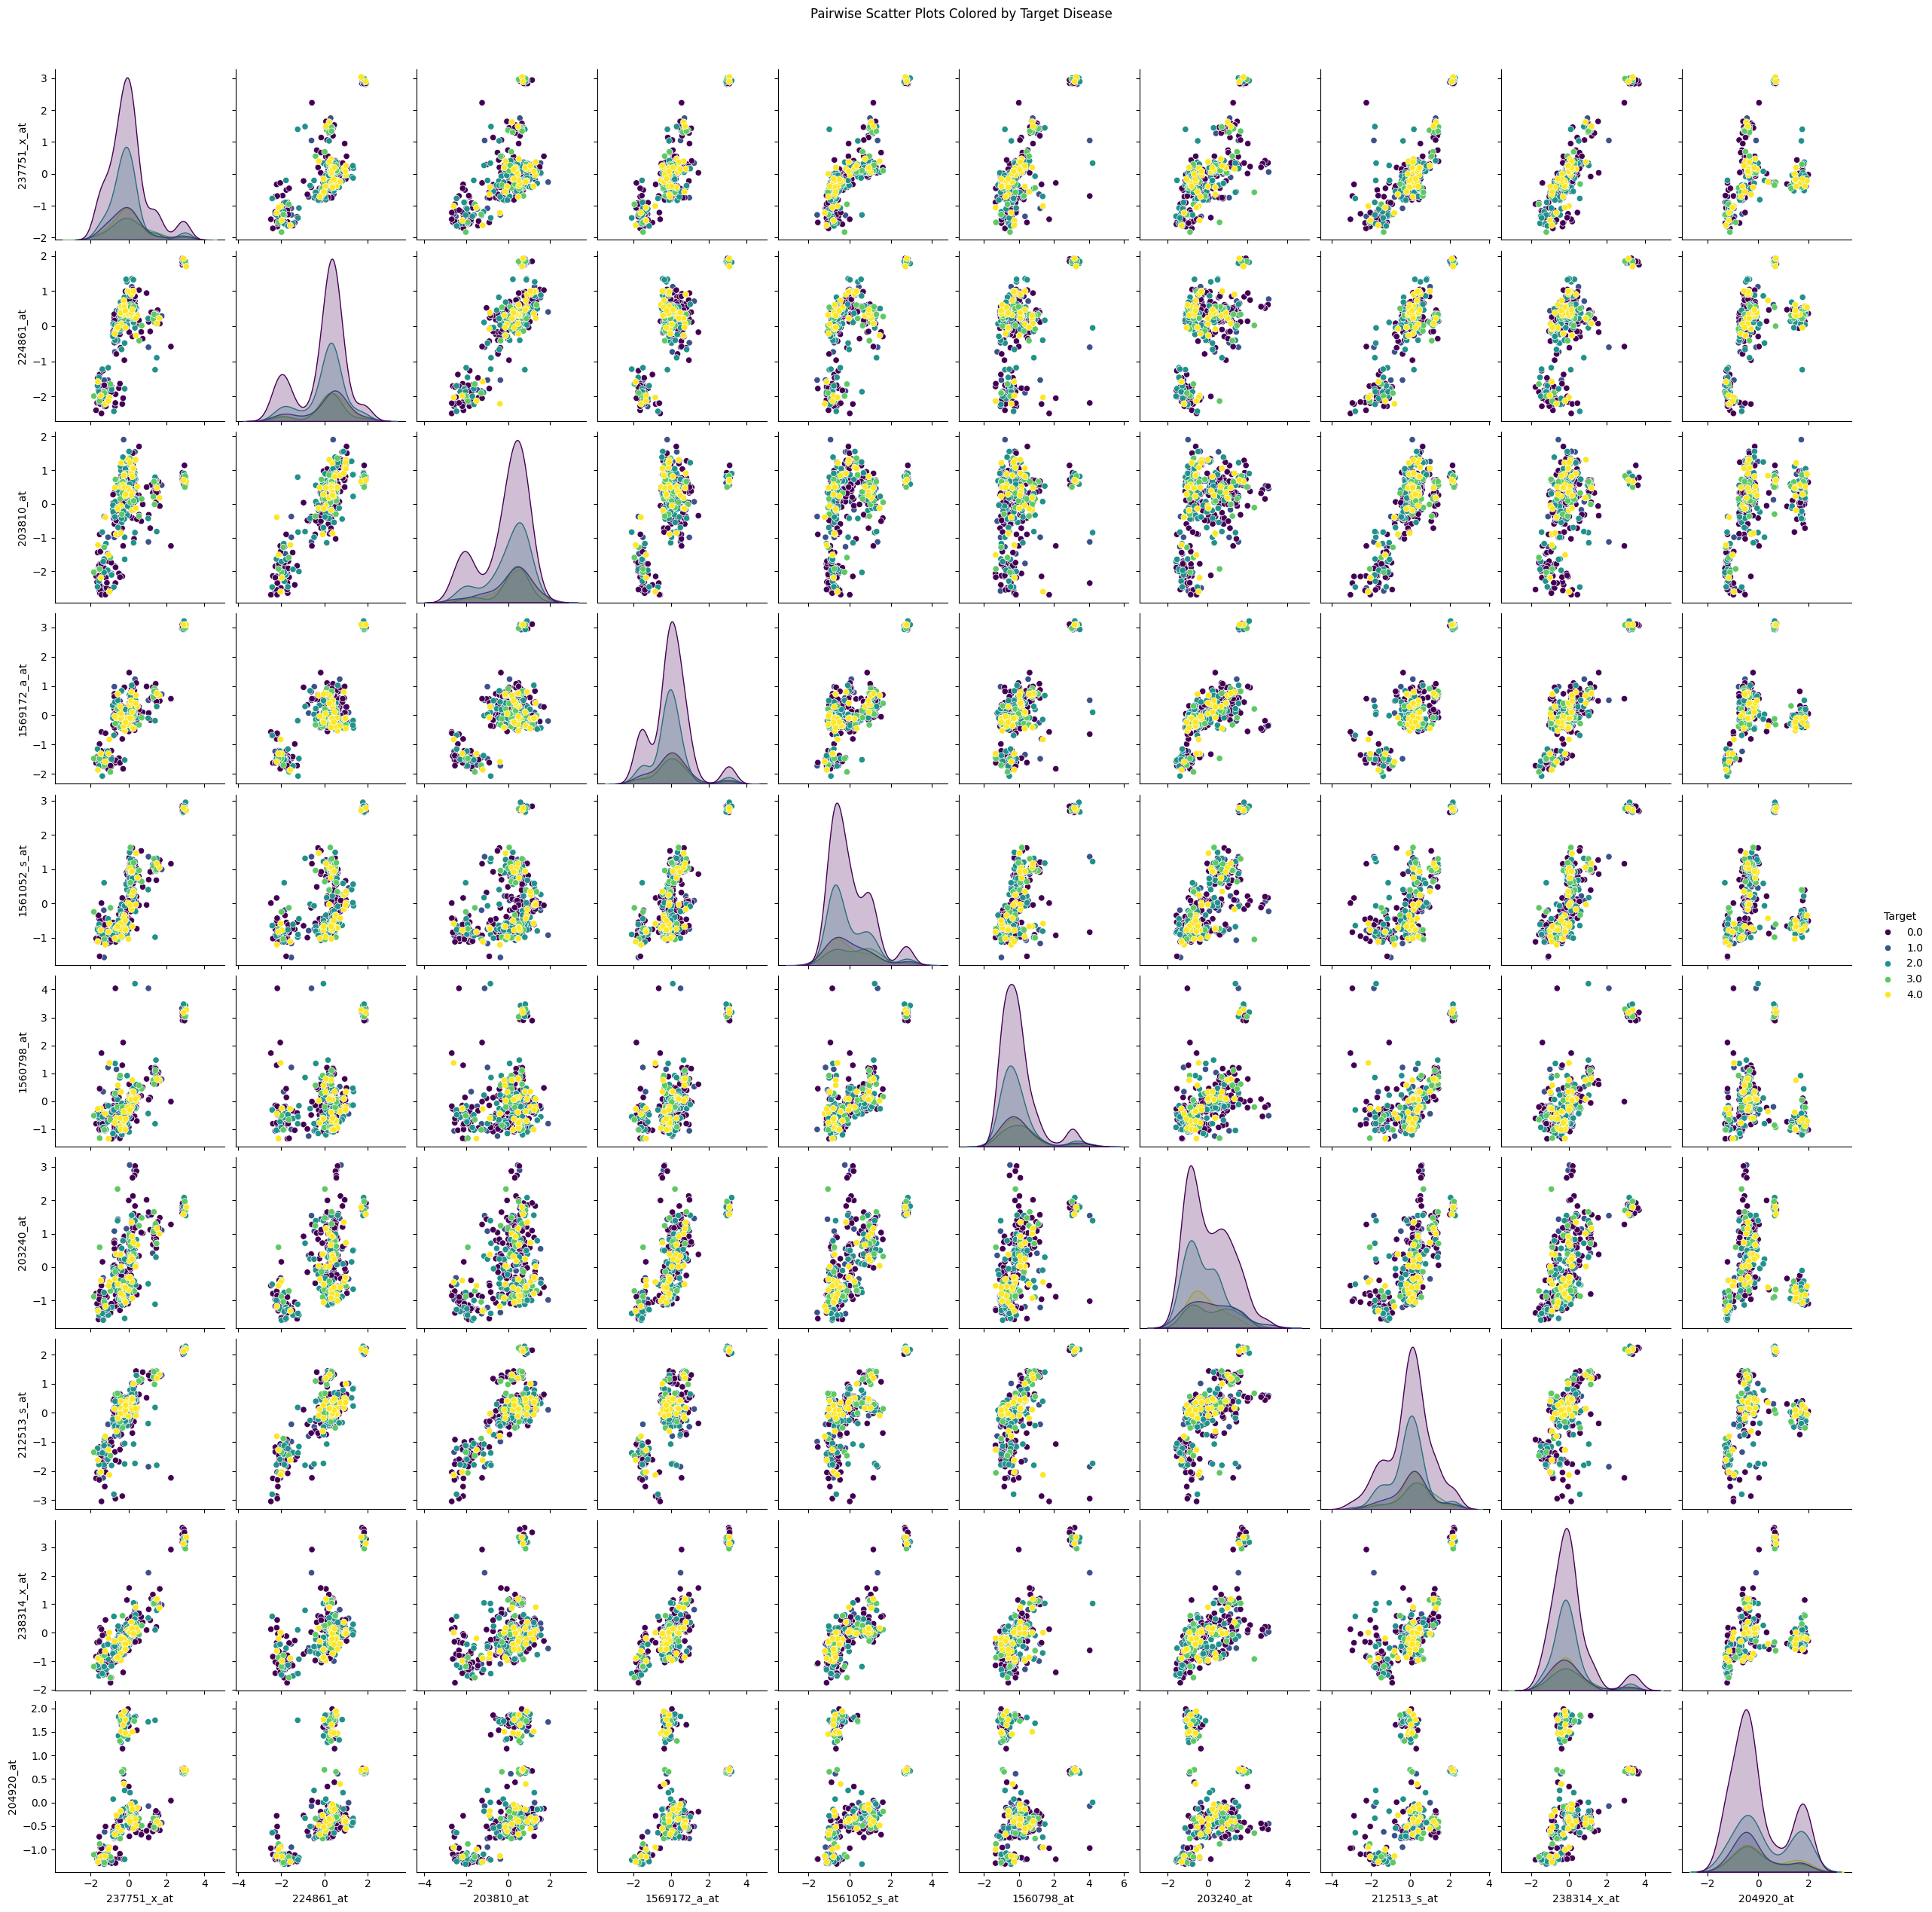

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X_train, columns=feature_names)
target_diseases = Y_train
df['Target'] = target_diseases

sns.pairplot(df, hue='Target', palette='viridis')
plt.suptitle('Pairwise Scatter Plots Colored by Target Disease', y=1.02)
plt.show()